<a id='importing-dependencies'></a>
<font size="+2" color='#053c96'><b> 1. Importing Libraries</b></font>  
[back to top](#table-of-contents)

In [1]:
import sys
# Insert the parent path relative to this notebook so we can import from the src folder.
sys.path.insert(0, "..")

from src.dependencies import *
from src.functions import *

To import the necessary dependencies from the src folder, we have inserted the parent path relative to our notebook using sys.path.insert(0, "..").

<a id='data'></a>
<font size="+2" color='#053c96'><b> 2. Data</b></font>  
[back to top](#table-of-contents)

#### Loading the data

Below is the data that will be used in analysis

In [2]:
df = load_dataset('../data/featured_financial_data.csv')
df1 = load_dataset('../data/cleaned_financial_data.csv')
df_new = df.copy()
df_new[['Industry', 'Country', 'Default', 'Date']] = df1[['Industry', 'Country', 'Default', 'Date']]

The load_dataset() function reads a CSV file called financials_data.csv from a folder called data which is located in a directory above the current working directory using the relative path ../src/data/. It loads the data into a pandas DataFrame object named df and returns it.

<a id='rule-based-approach'></a>

<font size="+2" color='#053c96'><b> 3. Statistical Analysis</b></font>  
[back to top](#table-of-contents)

<a id='statistical-analysis'></a>
<font size="+1" color='#780404'><b> 3.1 Benford's Law</b></font>  
[back to top](#table-of-contents)

The reports we will present here provides results of statistical tests performed to determine whether our dataset conforms to Benford's Law. Benford's Law is a mathematical theory that states that in many naturally occurring datasets, the distribution of the first digit of the numbers follows a specific pattern. **According to Benford's Law, the frequency of the digit 1 should be approximately 30.1%, followed by 17.6% for the digit 2, and decreasing percentages for each successive digit, with the digit 9 appearing only 4.6% of the time**.

The tests used to assess conformity to Benford's Law are the First Digit Test. The First Digit Test compares the observed distribution of the first digit of the numbers in the dataset with the expected distribution according to Benford's Law.

The results of the First Digit Test is presented in the reports as follows:

`Mean Absolute Deviation (MAD)`: This measures the average deviation of the observed distribution from the expected distribution. If MAD is greater than 0.015, then the data is considered to be nonconforming to Benford's Law.

`Bhattacharyya Coefficient`: This measures the similarity between the observed distribution and the expected distribution. The coefficient ranges from 0 (no similarity) to 1 (perfect similarity).

`Bhattacharyya Distance`: This measures the difference between the observed distribution and the expected distribution. The distance ranges from 0 (no difference) to 1 (maximum difference).

`Kullback-Leibler Divergence`: This measures the information lost when the expected distribution is used to approximate the observed distribution.

`Kolmogorov-Smirnov Test`: This tests whether the observed distribution is significantly different from the expected distribution in terms of distribution.

`Chi-Square Test`: This tests whether the observed distribution is significantly different from the expected distribution in terms of frequency.

Based on our objectives the tests in the reports will be carried out at a significance level of 95%.

<a id='selection'></a>

<font size="+1" color='#780404'><b> 3.1.1 Hypothesis Testing</b></font>  
[back to top](#table-of-contents)

#### First Hypothesis
- **H0**: The frequency distribution of the numbers in key financial features of the different industries is not significantly different from Benford’s distribution.
- **H1**: The frequency distribution of the numbers in key financial features of the different industries is significantly different from Benford’s distribution.

#### Construction Industry

In [3]:
construction_df = df_new[df_new['Industry']=='CONSTRUCTION']

##### Income Statement


 ########## Benford Object Instantiated ########### 

Initial sample size: 2030.

Test performed on 2030 registries.

Number of discarded entries for each test:
{'F1D': 0, 'F2D': 0, 'F3D': 0, 'SD': 0, 'L2D': 0}

Added Mantissas test.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.011497
0.006000 < MAD <= 0.012000: Acceptable conformity.

Bhattacharyya Coefficient: 0.995627

Bhattacharyya Distance: 0.004382

Kullback-Leibler Divergence: 0.019282

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.047561 
	Critical value: 0.030141 -- FAIL

	Chi square: 97.437794 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant deviations are:

             Expected  Found  Z_score
First_1_Dig                          
9                0.05   0.09     9.52
2                0.18   0.16     2.10
1                0.30   0.28     2.06


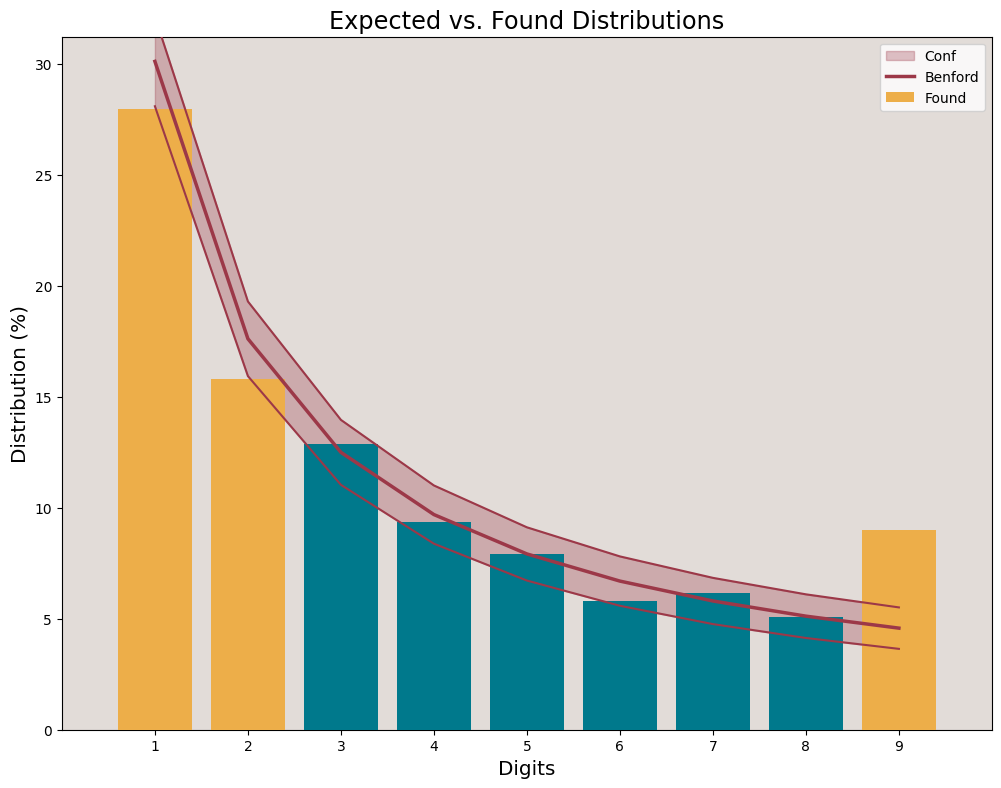

In [4]:
con_rev_benf = bf.Benford(construction_df['Revenue'], confidence=95)
con_rev_benf.F1D.report(high_Z='all')

##### Balance Sheet


 ########## Benford Object Instantiated ########### 

Initial sample size: 2030.

Test performed on 2030 registries.

Number of discarded entries for each test:
{'F1D': 1041, 'F2D': 1041, 'F3D': 1041, 'SD': 1041, 'L2D': 1041}

Added Mantissas test.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.027688
MAD > 0.015000: Nonconformity.

Bhattacharyya Coefficient: 0.990867

Bhattacharyya Distance: 0.009175

Kullback-Leibler Divergence: 0.036716

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.061963 
	Critical value: 0.043182 -- FAIL

	Chi square: 74.623099 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant deviations are:

             Expected  Found  Z_score
First_1_Dig                          
6                0.07   0.11     5.25
1                0.30   0.36     4.21
3                0.12   0.08     3.95
2                0.18   0.13     3.64


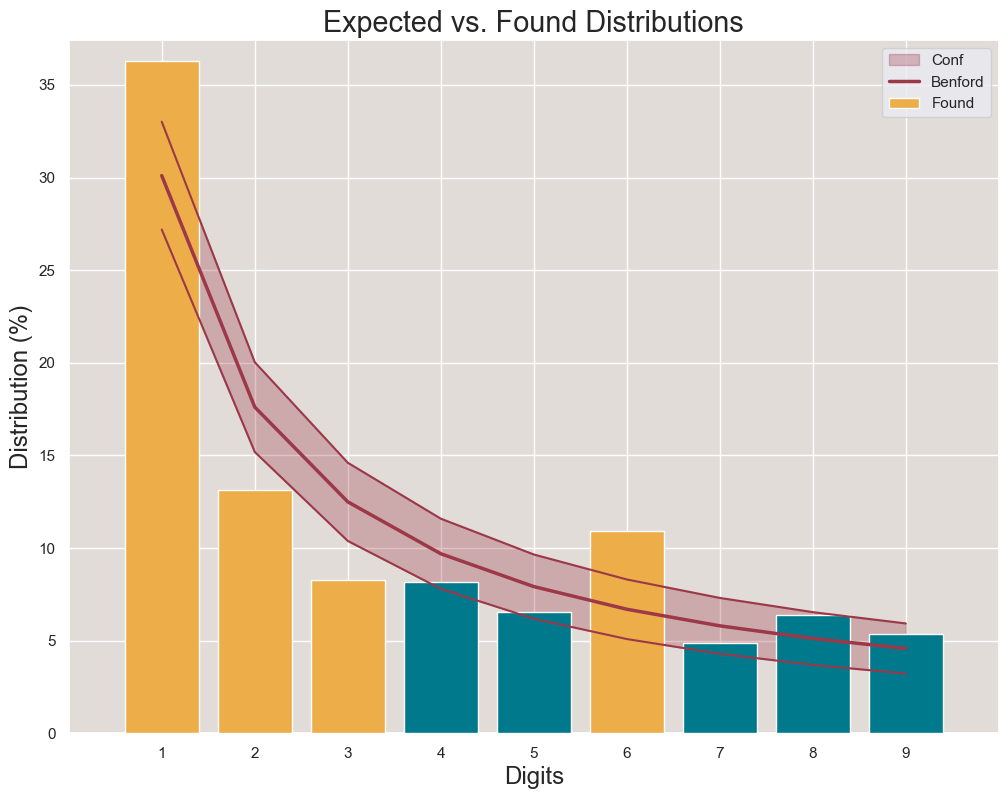

In [101]:
con_nw_benf = bf.Benford(construction_df['NetWorth'], confidence=95)
con_nw_benf.F1D.report(high_Z='all')

##### CashFlow Statement


 ########## Benford Object Instantiated ########### 

Initial sample size: 2030.

Test performed on 1851 registries.

Number of discarded entries for each test:
{'F1D': 430, 'F2D': 430, 'F3D': 430, 'SD': 430, 'L2D': 430}

Added Mantissas test.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.012419
0.012000 < MAD <= 0.015000: Marginally Acceptable conformity.

Bhattacharyya Coefficient: 0.998075

Bhattacharyya Distance: 0.001927

Kullback-Leibler Divergence: 0.007714

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.024549 
	Critical value: 0.036025 -- PASS

	Chi square: 22.089351 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant deviations are:

             Expected  Found  Z_score
First_1_Dig                          
2                0.18   0.15     2.77
9                0.05   0.06     2.47


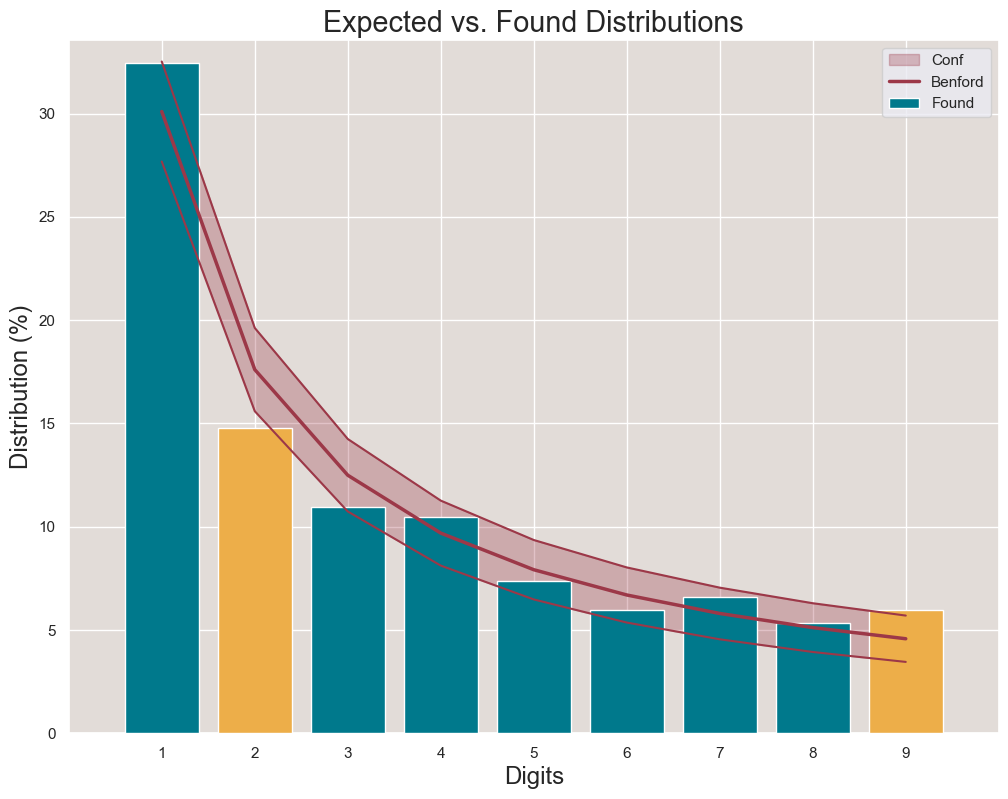

In [102]:
con_ncff_benf = bf.Benford(construction_df['CFF_NetCFF'], confidence=95)
con_ncff_benf.F1D.report(high_Z='all')

#### Unknown Industry

In [107]:
unknown_df = df_new[df_new['Industry']=='UNKNOWN']

##### Income Statement


 ########## Benford Object Instantiated ########### 

Initial sample size: 1759.

Test performed on 1759 registries.

Number of discarded entries for each test:
{'F1D': 1325, 'F2D': 1325, 'F3D': 1325, 'SD': 1325, 'L2D': 1325}

Added Mantissas test.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.061408
MAD > 0.015000: Nonconformity.

Bhattacharyya Coefficient: 0.950873

Bhattacharyya Distance: 0.050374

Kullback-Leibler Divergence: 0.181911

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.198970 
	Critical value: 0.065186 -- FAIL

	Chi square: 145.303686 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant deviations are:

             Expected  Found  Z_score
First_1_Dig                          
1                0.30   0.50     8.98
2                0.18   0.07     5.91
5                0.08   0.02     4.42
4                0.10   0.03     4.31
3                0.12   0.19     3.81
7                0.06  

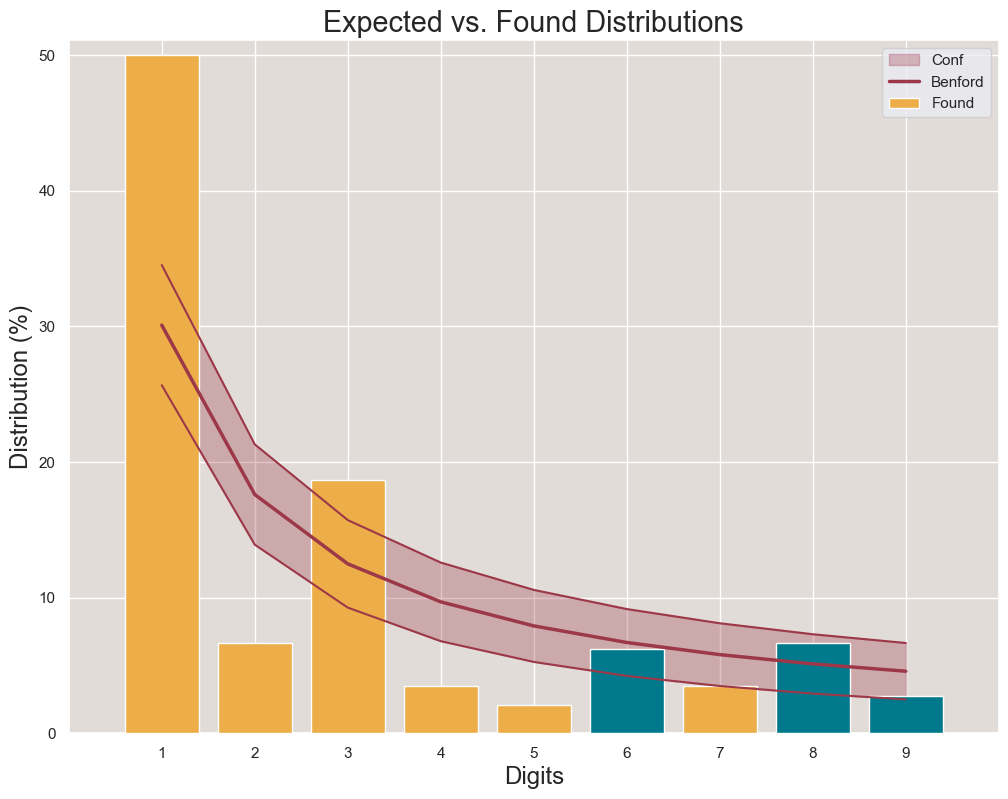

In [108]:
un_rev_benf = bf.Benford(unknown_df['Revenue'], confidence=95)
un_rev_benf.F1D.report(high_Z='all')

##### Balance Sheet


 ########## Benford Object Instantiated ########### 

Initial sample size: 1759.

Test performed on 1759 registries.

Number of discarded entries for each test:
{'F1D': 476, 'F2D': 476, 'F3D': 476, 'SD': 476, 'L2D': 476}

Added Mantissas test.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.026353
MAD > 0.015000: Nonconformity.

Bhattacharyya Coefficient: 0.991070

Bhattacharyya Distance: 0.008970

Kullback-Leibler Divergence: 0.035392

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.069656 
	Critical value: 0.037913 -- FAIL

	Chi square: 90.735512 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant deviations are:

             Expected  Found  Z_score
First_1_Dig                          
2                0.18   0.11     5.82
6                0.07   0.11     5.43
1                0.30   0.35     3.79
3                0.12   0.09     3.53
8                0.05   0.06     2.14


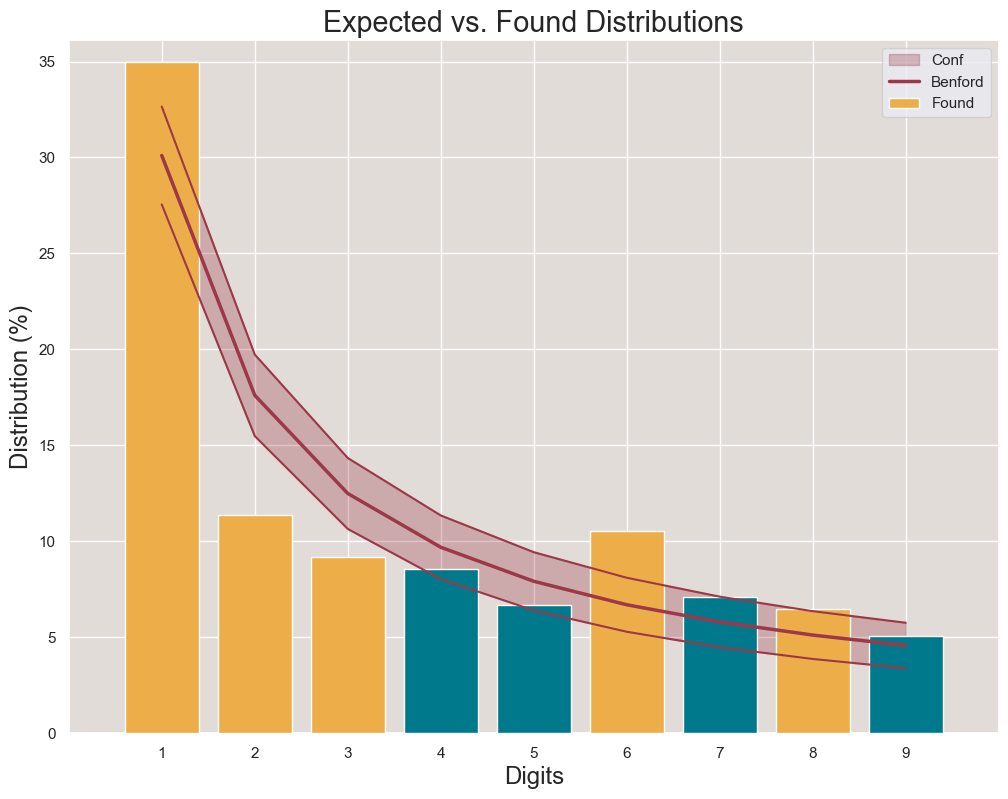

In [115]:
un_nw_benf = bf.Benford(unknown_df['NetWorth'], confidence=95)
un_nw_benf.F1D.report(high_Z='all')

##### Cash Flow Statement


 ########## Benford Object Instantiated ########### 

Initial sample size: 1759.

Test performed on 1474 registries.

Number of discarded entries for each test:
{'F1D': 178, 'F2D': 178, 'F3D': 178, 'SD': 178, 'L2D': 178}

Added Mantissas test.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.007140
0.006000 < MAD <= 0.012000: Acceptable conformity.

Bhattacharyya Coefficient: 0.999181

Bhattacharyya Distance: 0.000819

Kullback-Leibler Divergence: 0.003283

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.019854 
	Critical value: 0.037722 -- PASS

	Chi square: 8.574363 
	Critical value: 15.507000 -- PASS

	Critical Z-score:1.96.

The entries with the significant deviations are:

             Expected  Found  Z_score
First_1_Dig                          
3                0.12   0.14     2.06


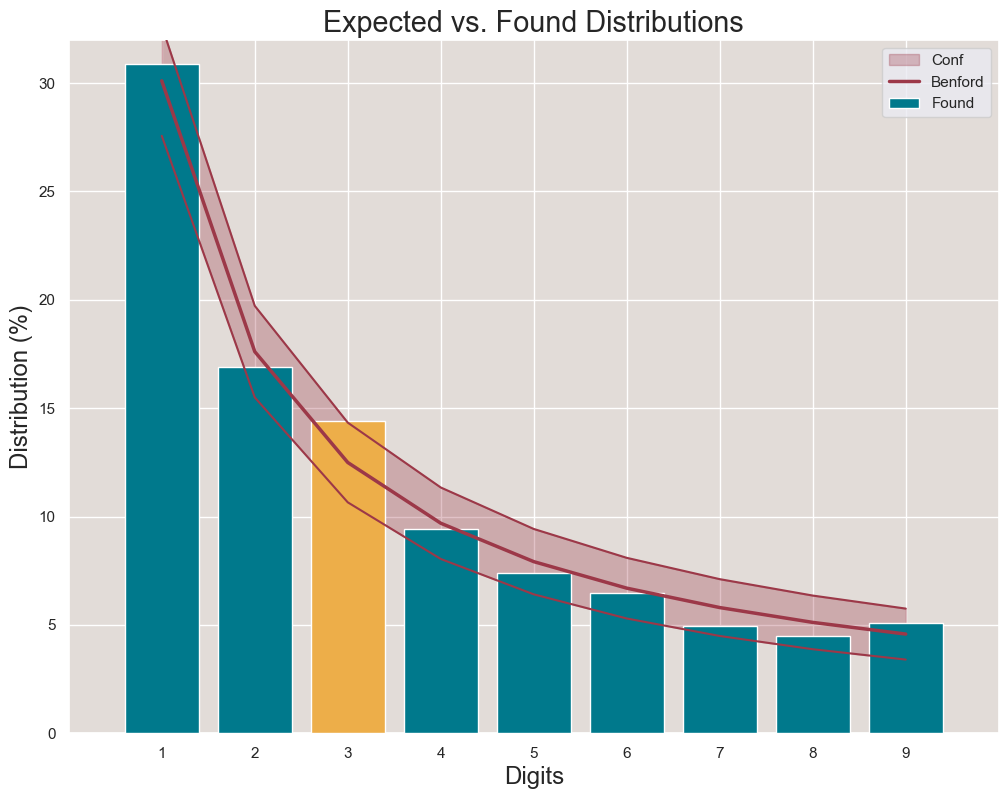

In [116]:
un_ncff_benf = bf.Benford(unknown_df['CFF_NetCFF'], confidence=95)
un_ncff_benf.F1D.report(high_Z='all')

#### Second Hypothesis
- **H0**: The frequency distribution of the numbers in key financial features of the different countries is not significantly different from Benford’s distribution.
- **H1**: The frequency distribution of the numbers in key financial features of the different countries is significantly different from Benford’s distribution.

#### South Africa

In [149]:
sa_df = df_new[df_new['Country']=='South Africa']

##### Income Statement


 ########## Benford Object Instantiated ########### 

Initial sample size: 2663.

Test performed on 2663 registries.

Number of discarded entries for each test:
{'F1D': 2365, 'F2D': 2365, 'F3D': 2365, 'SD': 2365, 'L2D': 2365}

Added Mantissas test.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.055500
MAD > 0.015000: Nonconformity.

Bhattacharyya Coefficient: 0.959423

Bhattacharyya Distance: 0.041424

Kullback-Leibler Divergence: 0.150739

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.155346 
	Critical value: 0.078667 -- FAIL

	Chi square: 82.530764 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant deviations are:

             Expected  Found  Z_score
First_1_Dig                          
1                0.30   0.46     5.78
2                0.18   0.06     5.17
3                0.12   0.20     4.08
5                0.08   0.03     3.24
6                0.07   0.03     2.42


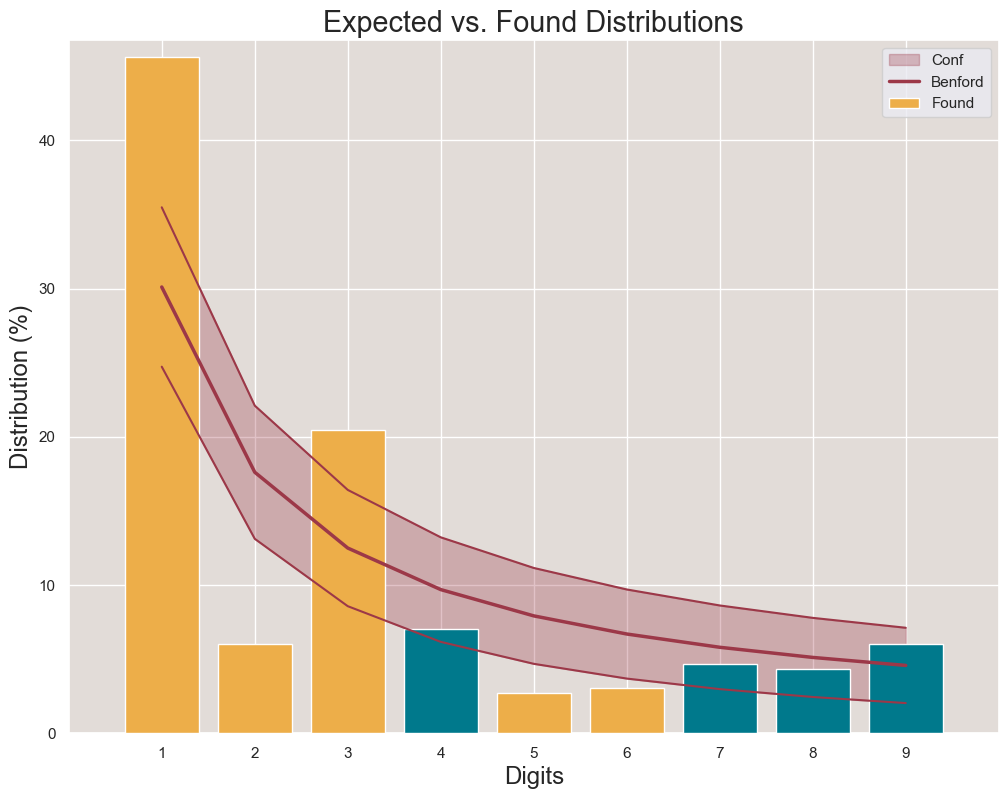

In [150]:
sa_rev_benf = bf.Benford(sa_df['Revenue'], confidence=95)
sa_rev_benf.F1D.report(high_Z='all')

##### Balance Sheet


 ########## Benford Object Instantiated ########### 

Initial sample size: 2663.

Test performed on 2663 registries.

Number of discarded entries for each test:
{'F1D': 1231, 'F2D': 1231, 'F3D': 1231, 'SD': 1231, 'L2D': 1231}

Added Mantissas test.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.029373
MAD > 0.015000: Nonconformity.

Bhattacharyya Coefficient: 0.989126

Bhattacharyya Distance: 0.010934

Kullback-Leibler Divergence: 0.044292

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.060702 
	Critical value: 0.035886 -- FAIL

	Chi square: 134.763357 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant deviations are:

             Expected  Found  Z_score
First_1_Dig                          
6                0.07   0.12     8.10
1                0.30   0.36     4.98
3                0.12   0.08     4.83
2                0.18   0.13     4.56
5                0.08   0.06     2.34
7                0.06  

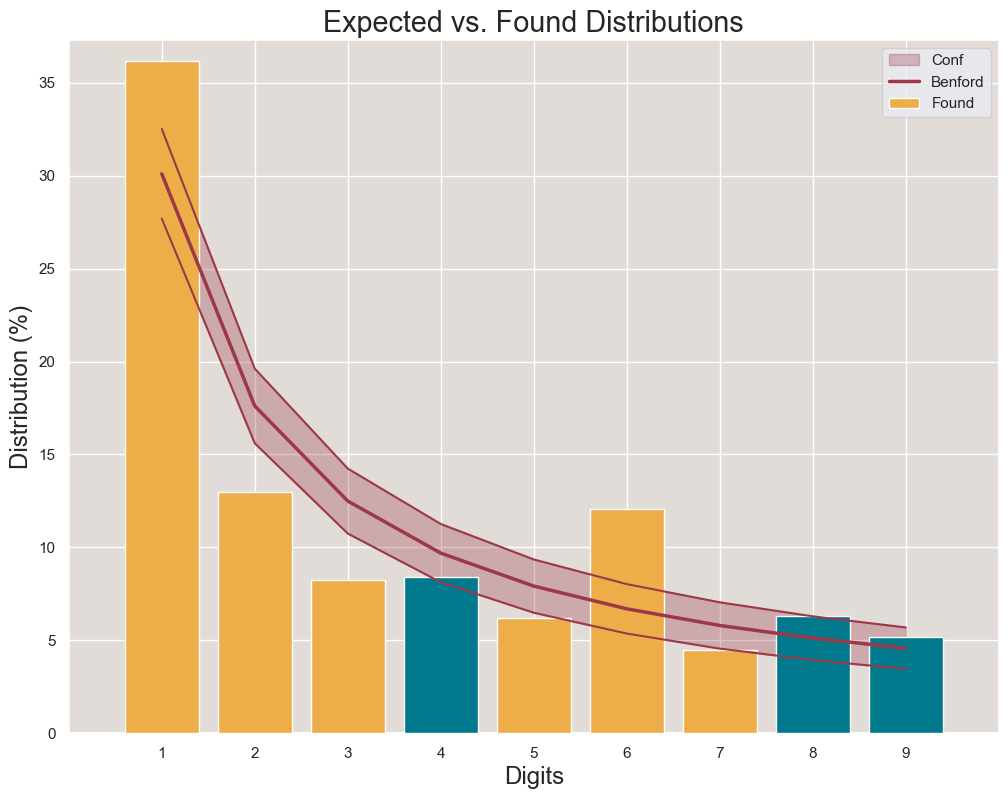

In [157]:
sa_nw_benf = bf.Benford(sa_df['NetWorth'], confidence=95)
sa_nw_benf.F1D.report(high_Z='all')

##### Cash Flow


 ########## Benford Object Instantiated ########### 

Initial sample size: 2663.

Test performed on 2392 registries.

Number of discarded entries for each test:
{'F1D': 482, 'F2D': 482, 'F3D': 482, 'SD': 482, 'L2D': 482}

Added Mantissas test.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.013621
0.012000 < MAD <= 0.015000: Marginally Acceptable conformity.

Bhattacharyya Coefficient: 0.997709

Bhattacharyya Distance: 0.002293

Kullback-Leibler Divergence: 0.009116

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.030907 
	Critical value: 0.031073 -- PASS

	Chi square: 34.618186 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant deviations are:

             Expected  Found  Z_score
First_1_Dig                          
2                0.18   0.14     3.89
1                0.30   0.33     2.92
9                0.05   0.06     2.75


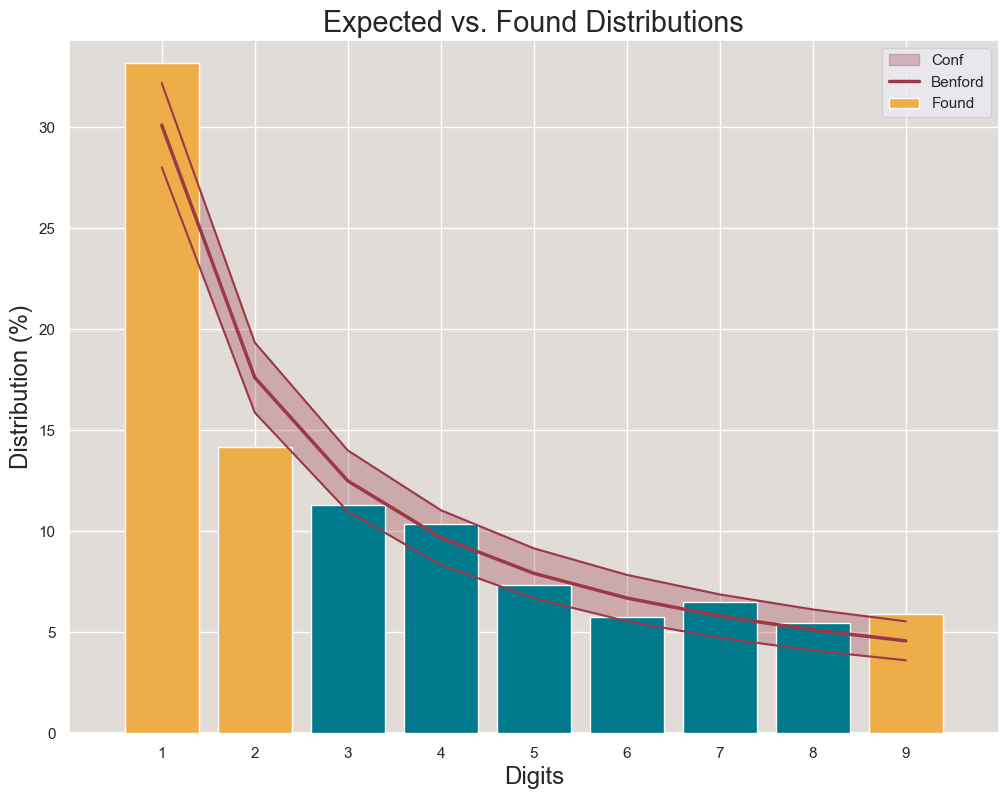

In [158]:
sa_ncff_benf = bf.Benford(sa_df['CFF_NetCFF'], confidence=95)
sa_ncff_benf.F1D.report(high_Z='all')

#### UKNOWN Countries

In [163]:
uc_df = df_new[df_new['Country']=='UNKNOWN']

##### Income Statement


 ########## Benford Object Instantiated ########### 

Initial sample size: 1762.

Test performed on 1762 registries.

Number of discarded entries for each test:
{'F1D': 1328, 'F2D': 1328, 'F3D': 1328, 'SD': 1328, 'L2D': 1328}

Added Mantissas test.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.061408
MAD > 0.015000: Nonconformity.

Bhattacharyya Coefficient: 0.950873

Bhattacharyya Distance: 0.050374

Kullback-Leibler Divergence: 0.181911

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.198970 
	Critical value: 0.065186 -- FAIL

	Chi square: 145.303686 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant deviations are:

             Expected  Found  Z_score
First_1_Dig                          
1                0.30   0.50     8.98
2                0.18   0.07     5.91
5                0.08   0.02     4.42
4                0.10   0.03     4.31
3                0.12   0.19     3.81
7                0.06  

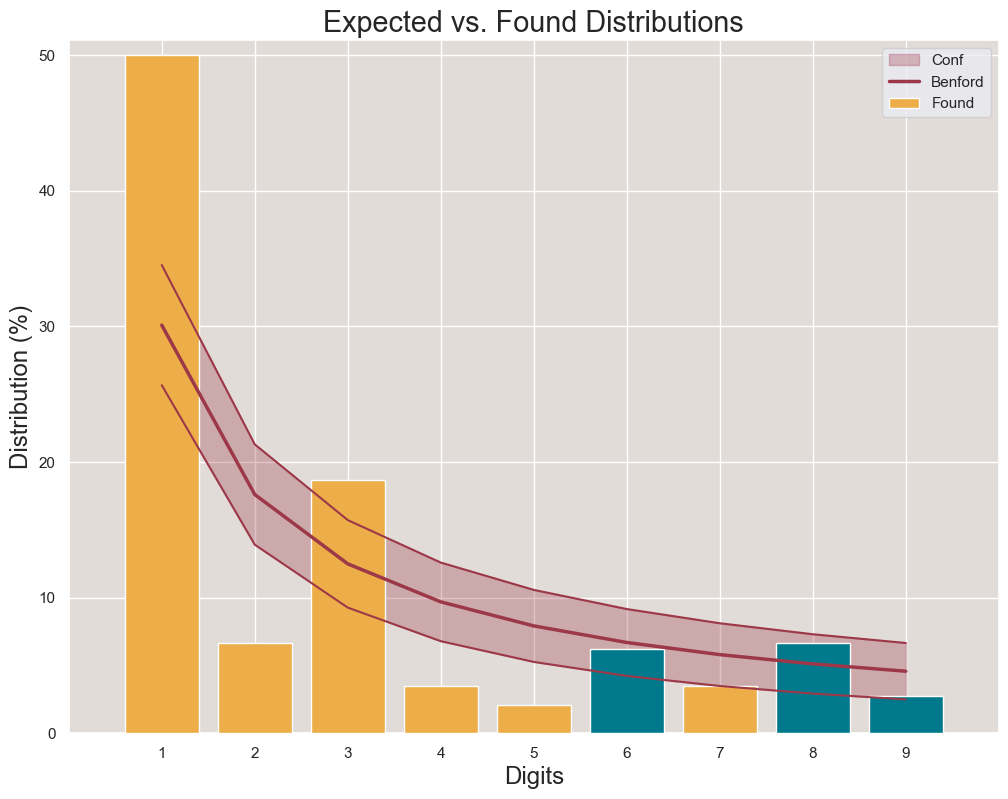

In [164]:
uc_rev_benf = bf.Benford(uc_df['Revenue'], confidence=95)
uc_rev_benf.F1D.report(high_Z='all')

##### Balance Sheet


 ########## Benford Object Instantiated ########### 

Initial sample size: 1762.

Test performed on 1762 registries.

Number of discarded entries for each test:
{'F1D': 479, 'F2D': 479, 'F3D': 479, 'SD': 479, 'L2D': 479}

Added Mantissas test.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.026353
MAD > 0.015000: Nonconformity.

Bhattacharyya Coefficient: 0.991070

Bhattacharyya Distance: 0.008970

Kullback-Leibler Divergence: 0.035392

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.069656 
	Critical value: 0.037913 -- FAIL

	Chi square: 90.735512 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant deviations are:

             Expected  Found  Z_score
First_1_Dig                          
2                0.18   0.11     5.82
6                0.07   0.11     5.43
1                0.30   0.35     3.79
3                0.12   0.09     3.53
8                0.05   0.06     2.14


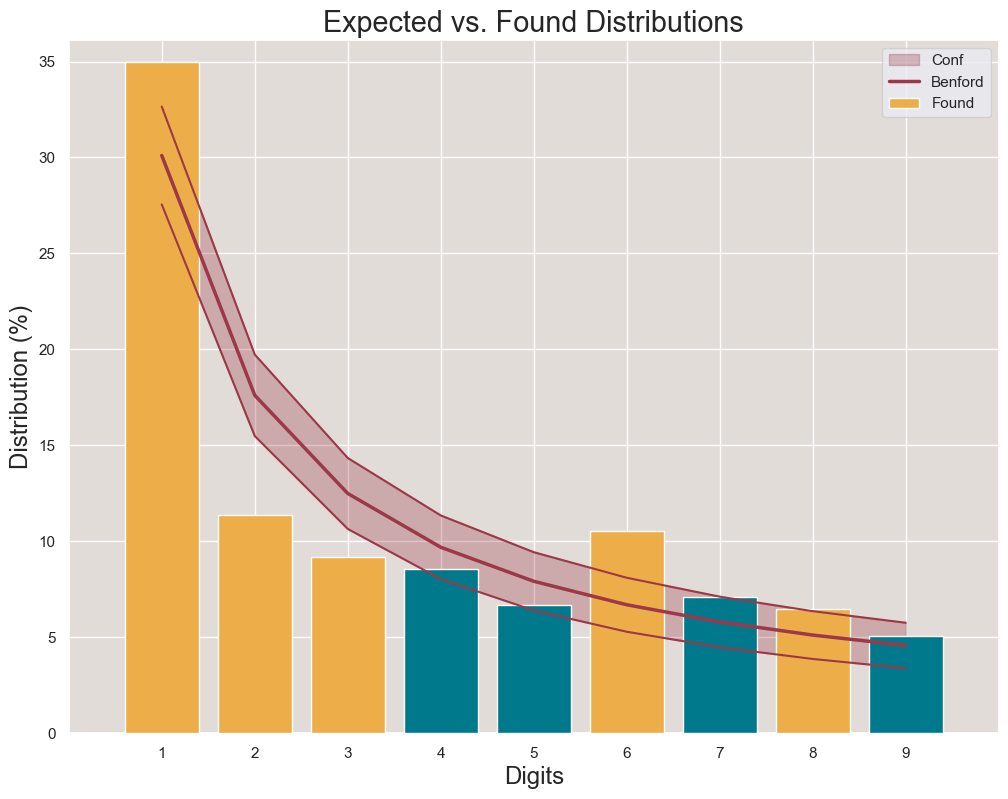

In [171]:
uc_nw_benf = bf.Benford(uc_df['NetWorth'], confidence=95)
uc_nw_benf.F1D.report(high_Z='all')

##### Cash Flow Statement


 ########## Benford Object Instantiated ########### 

Initial sample size: 1762.

Test performed on 1474 registries.

Number of discarded entries for each test:
{'F1D': 178, 'F2D': 178, 'F3D': 178, 'SD': 178, 'L2D': 178}

Added Mantissas test.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.007140
0.006000 < MAD <= 0.012000: Acceptable conformity.

Bhattacharyya Coefficient: 0.999181

Bhattacharyya Distance: 0.000819

Kullback-Leibler Divergence: 0.003283

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.019854 
	Critical value: 0.037722 -- PASS

	Chi square: 8.574363 
	Critical value: 15.507000 -- PASS

	Critical Z-score:1.96.

The entries with the significant deviations are:

             Expected  Found  Z_score
First_1_Dig                          
3                0.12   0.14     2.06


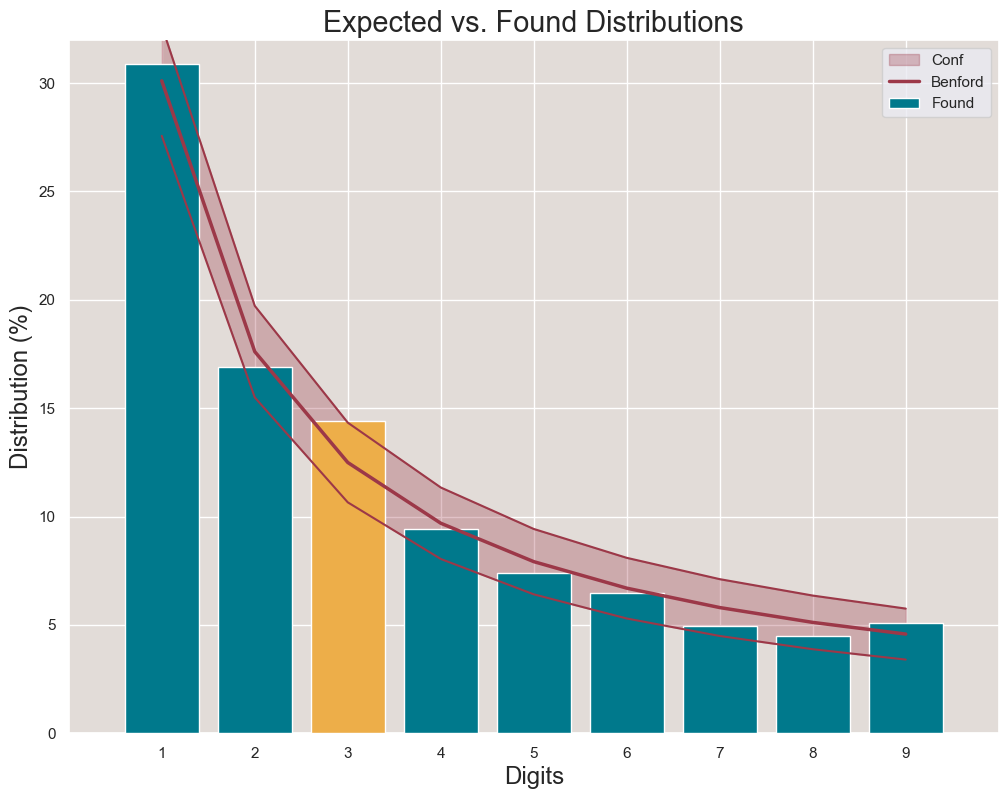

In [172]:
uc_ncff_benf = bf.Benford(uc_df['CFF_NetCFF'], confidence=95)
uc_ncff_benf.F1D.report(high_Z='all')